# 1. Importando Bibliotecas

In [12]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.63)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-nmv72b_h
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-nmv72b_h
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp37-none-any.whl size=75776 sha256=847a37701e65832aaf18aadd005d04cd1f49e281514428f59c32d90e34f097d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkq7_hf2/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
Successfully built pyfolio


# 2. Obtendo e tratando os dados

In [4]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA', '^BVSP']

dados_yahoo = web.get_data_yahoo(tickers, period='5y')['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [5]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2016-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-11,0.000000,0.001282,0.014706,0.041384,-0.021898,0.015412
2016-07-12,0.001557,-0.015365,0.028986,0.049229,-0.014179,0.005486
2016-07-13,-0.010363,0.023407,0.009390,0.007349,0.013626,0.006303
2016-07-14,0.000000,0.044472,0.009302,-0.026375,0.029126,0.016173
...,...,...,...,...,...,...
2021-07-02,0.013372,0.005371,0.012442,0.020669,0.029489,0.015565
2021-07-05,0.029260,-0.013357,0.001536,-0.003610,-0.009926,-0.005501
2021-07-06,-0.021739,-0.003610,-0.004090,0.005302,-0.010312,-0.014379


In [6]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2016-07-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-07-11,1.000000,1.001282,1.014706,1.041384,0.978102,1.015412
2016-07-12,1.001557,0.985897,1.044118,1.092650,0.964234,1.020982
2016-07-13,0.991178,1.008975,1.053922,1.100680,0.977373,1.027418
2016-07-14,0.991178,1.053846,1.063725,1.071649,1.005840,1.044034
...,...,...,...,...,...,...
2021-07-02,1.039185,2.133820,9.929819,8.739493,7.226255,2.401573
2021-07-05,1.069591,2.105318,9.945072,8.707945,7.154526,2.388363
2021-07-06,1.046339,2.097718,9.904397,8.754112,7.080747,2.354020


In [11]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2016-07-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2016-07-11,10000.000000,10012.820488,10147.059100,10413.835133,9781.023061,50354.737782,0.007095
2016-07-12,10015.568994,9858.974627,10441.177300,10926.499250,9642.340043,50884.560215,0.010522
2016-07-13,9911.781763,10089.746137,10539.215083,11006.795827,9773.726012,51321.264823,0.008582
2016-07-14,9911.781763,10538.461420,10637.254079,10716.491971,10058.396913,51862.386146,0.010544
...,...,...,...,...,...,...,...
2021-07-02,10391.846036,21338.199864,99298.194935,87394.928483,72262.552253,290685.721571,0.018611
2021-07-05,10695.910509,21053.184550,99450.720513,87079.448291,71545.258316,289824.522179,-0.002963
2021-07-06,10463.389949,20977.180346,99043.969476,87541.121323,70807.465799,288833.126893,-0.003421


# 3. Resultados


Start date,2016-07-08
End date,2021-07-08
Total months,59
,Backtest
Annual return,42.827%
Cumulative returns,479.417%
Annual volatility,32.051%
Sharpe ratio,1.28
Calmar ratio,1.03
Stability,0.84
Max drawdown,-41.621%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.62,2020-01-23,2020-03-23,2020-07-22,130
1,26.01,2018-02-26,2018-06-25,2019-12-04,463
2,18.03,2017-02-21,2017-04-13,2017-08-07,120
3,13.02,2021-01-08,2021-01-29,2021-04-12,67
4,12.47,2016-11-28,2016-12-22,2017-01-16,36


Stress Events,mean,min,max
New Normal,0.16%,-14.00%,12.53%


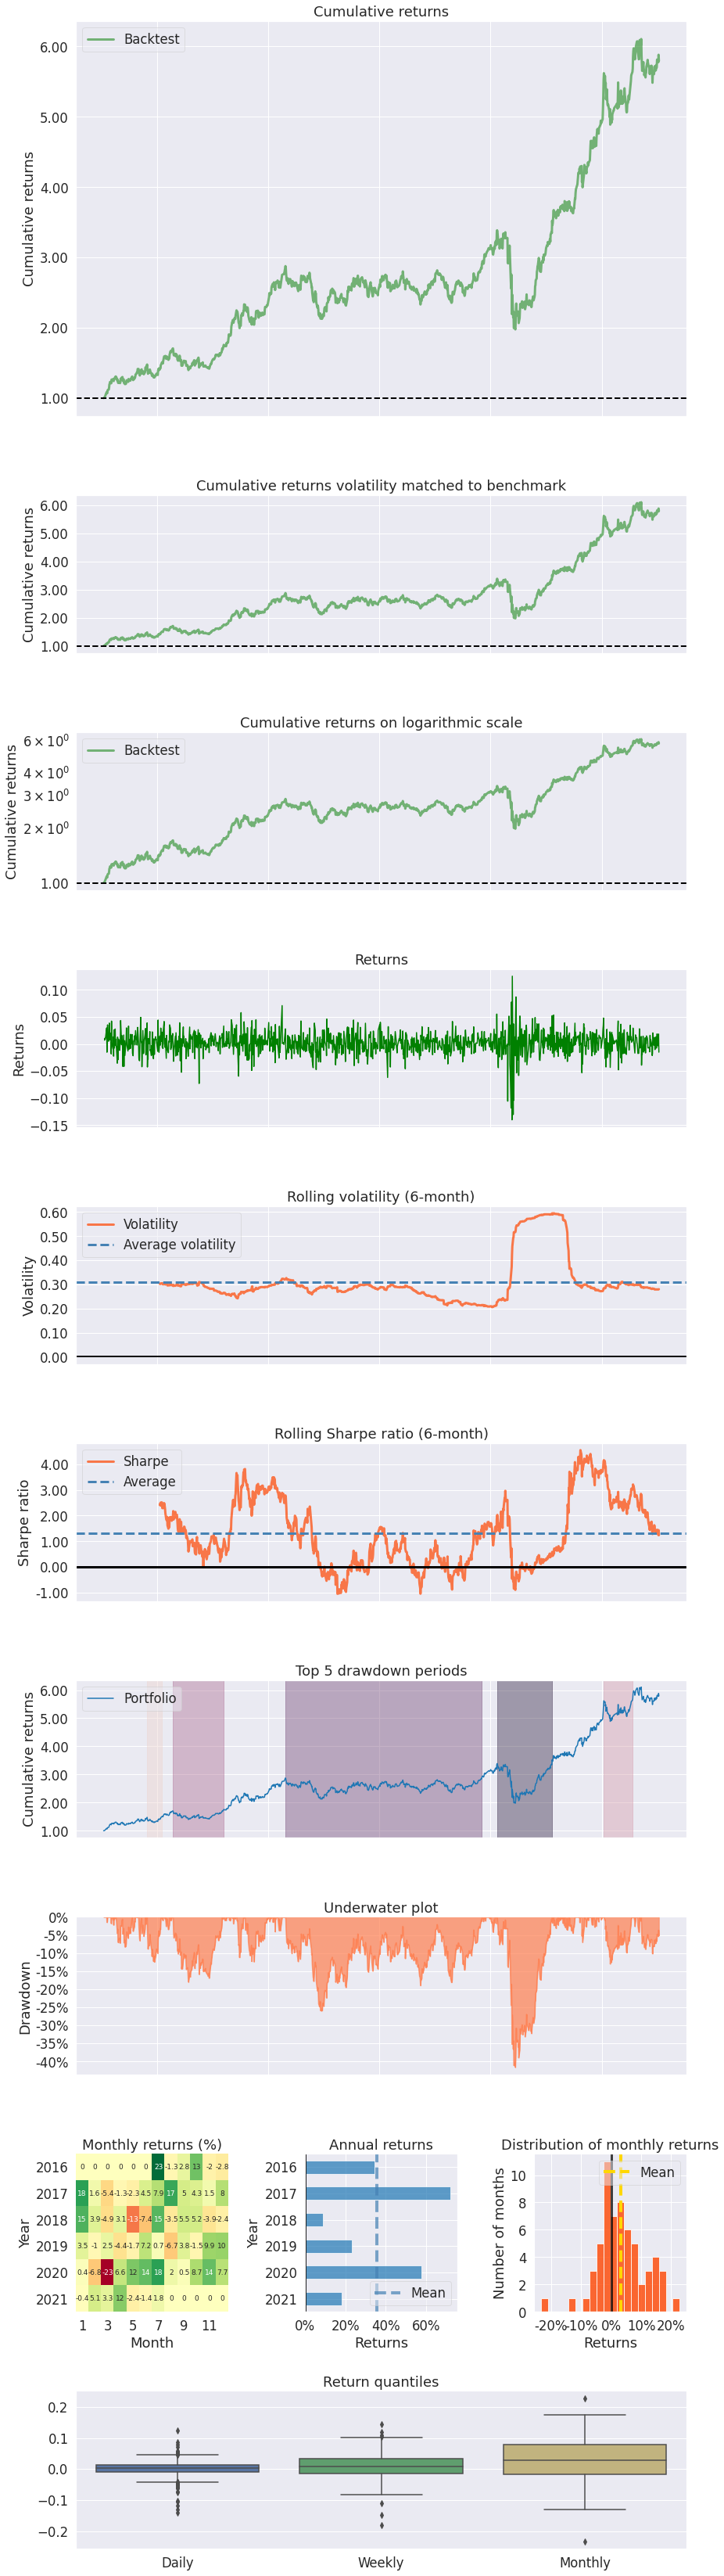

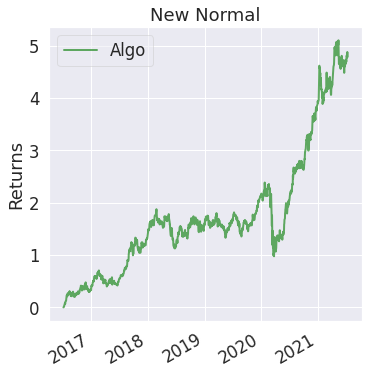

In [8]:

pf.create_full_tear_sheet(carteira['retorno'])

#pf.create_full_tear_sheet(carteira['retorno'], benchmark_rets=retorno["^BVSP"])

Text(0, 0.5, '(0.8, 1.4)')

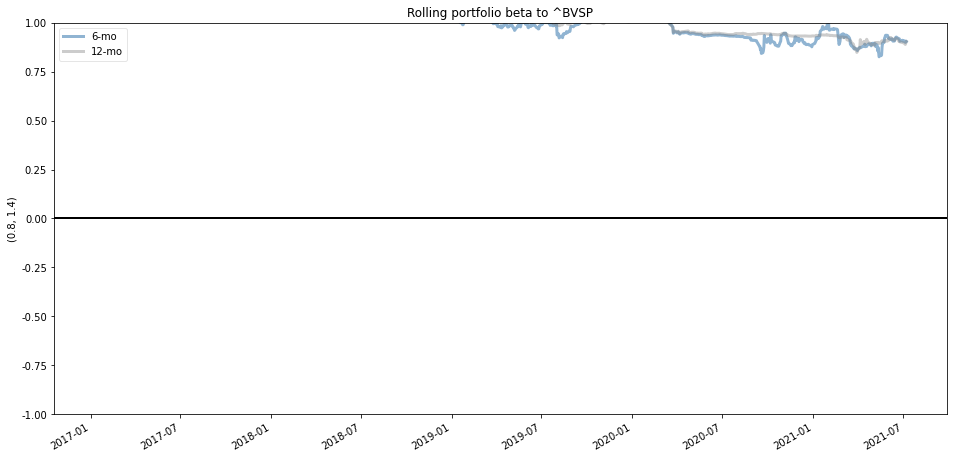

In [10]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira['retorno'], factor_returns=retorno['^BVSP'], ax=ax1)
plt.ylabel((0.8, 1.4))